In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import joblib as jl
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
data=pd.read_hdf('../data/FigureS11.h5', key = 'data')

In [3]:
shuffled_embs=data['embedding']['shuffled']
non_shuffled_embs = data['embedding']['non-shuffled']

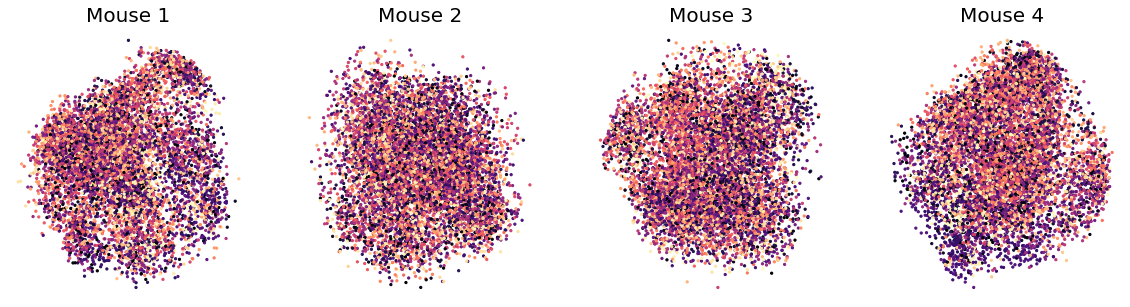

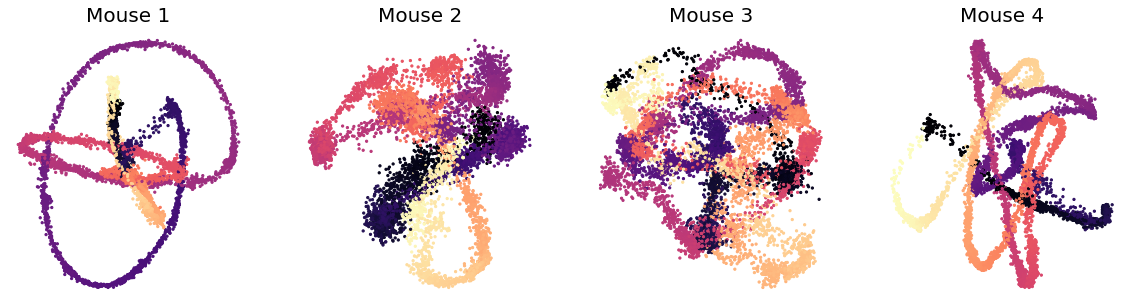

In [4]:
idx1, idx2 = 0,1
plt.figure(figsize=(20,5))
for i in range(4):
    ax = plt.subplot(1,4,i+1)
    ax.scatter(shuffled_embs['feature'][i][:,idx1], shuffled_embs['feature'][i][:,idx2], s=5, c = np.tile(shuffled_embs['label'][i],10), cmap = 'magma')
    plt.axis('off')
    ax.set_title(f'Mouse {i+1}', fontsize=20)
plt.figure(figsize=(20,5))
for i in range(4):
    ax = plt.subplot(1,4,i+1)
    ax.scatter(non_shuffled_embs['feature'][i][:,idx1], non_shuffled_embs['feature'][i][:,idx2], s=5, c = np.tile(non_shuffled_embs['label'][i],10), cmap = 'magma')
    plt.axis('off')
    ax.set_title(f'Mouse {i+1}', fontsize=20)

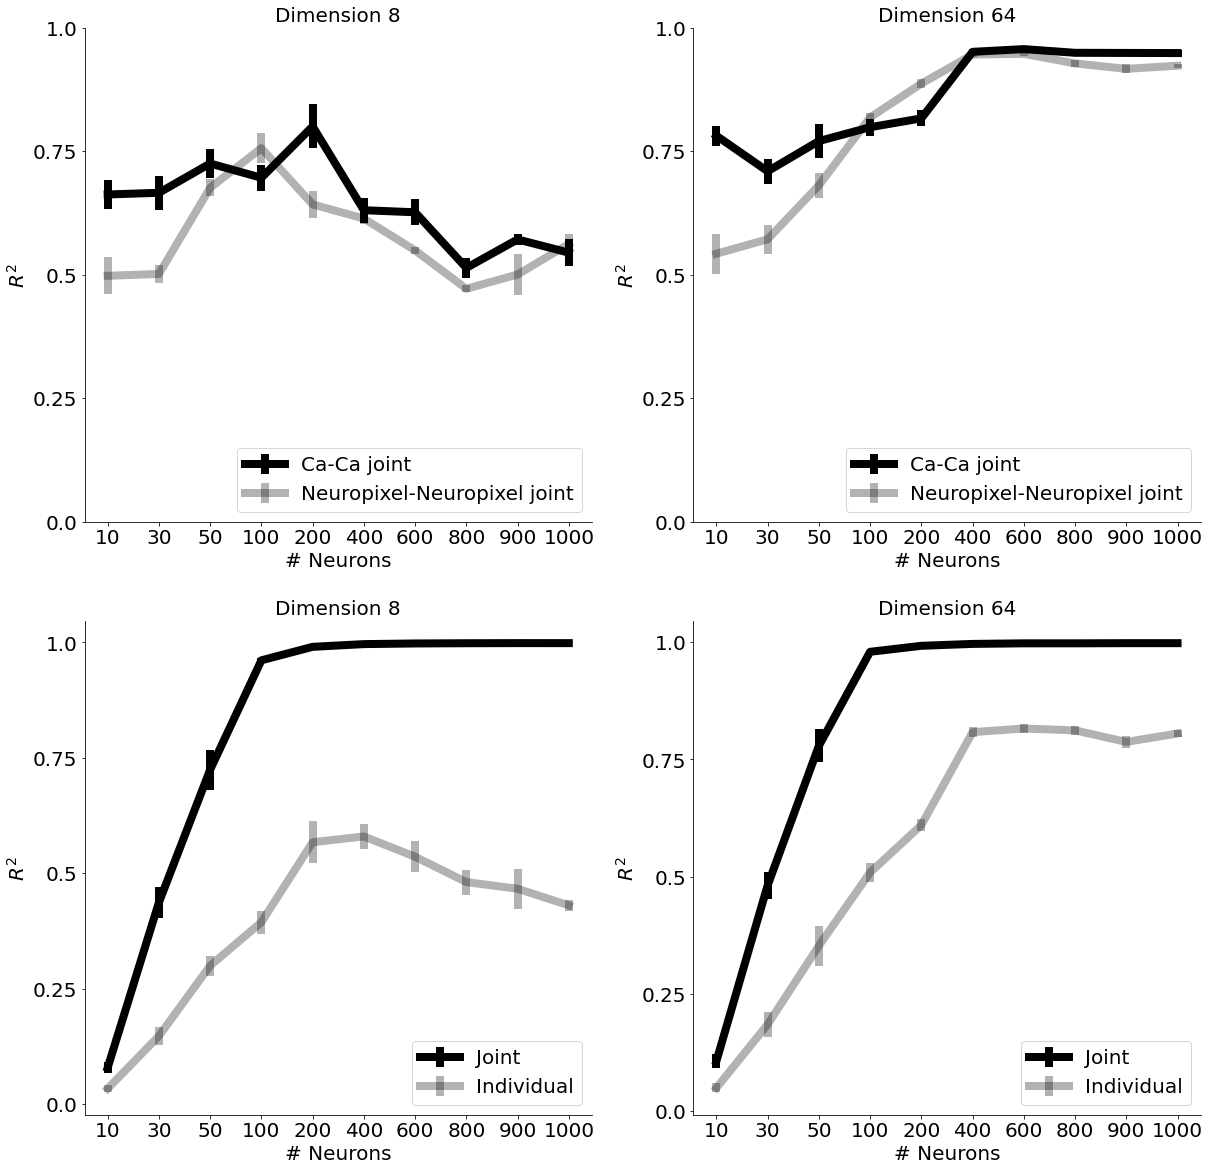

In [5]:
plt.figure(figsize=(20,20))
def get_mean_err_dic(score_dic):
    means = []
    errs= []
    for k in score_dic:
        means.append(np.mean(score_dic[k]))
        errs.append(np.std(score_dic[k], ddof=1)/np.sqrt(len(score_dic[k])))
    return means, errs

for i, d in enumerate([8,64]):
    ax1=plt.subplot(2,2 ,i+1)

    ca_ca_joint_res = get_mean_err_dic(data['consistency']['ca-ca_joint'][d])
    np_np_joint_res = get_mean_err_dic(data['consistency']['np-np_joint'][d])

    ax1.errorbar(np.arange(10),ca_ca_joint_res[0], ca_ca_joint_res[1], label = 'Ca-Ca joint', color = 'black', markersize=20, linewidth = 8)
    ax1.errorbar(np.arange(10),np_np_joint_res[0], np_np_joint_res[1], label = 'Neuropixel-Neuropixel joint', alpha = 0.3,color = 'black', markersize=20, linewidth = 8)
    ax1.set_title(f'Dimension {d}', fontsize=20)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.xticks(np.arange(10), [10,30, 50, 100, 200, 400, 600, 800, 900, 1000], fontsize = 20)
    plt.yticks(np.linspace(0,1,5), np.linspace(0,1,5),fontsize = 20)
    plt.xlabel('# Neurons', fontsize = 20)
    plt.ylabel('$R^2$', fontsize= 20)
    plt.legend(fontsize= 20, loc = 'lower right')


    ax2=plt.subplot(2,2, (i+3))

    individual = get_mean_err_dic(data['consistency']['individual'][d])
    joint = get_mean_err_dic(data['consistency']['joint'][d])

    ax2.errorbar(np.arange(10),joint[0], joint[1], label = 'Joint', color = 'black', markersize=20, linewidth = 8)
    ax2.errorbar(np.arange(10),individual[0], individual[1], label = 'Individual', alpha = 0.3,color = 'black', markersize=20, linewidth = 8)
    ax2.set_title(f'Dimension {d}', fontsize=20)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.xticks(np.arange(10), [10,30, 50, 100, 200, 400, 600, 800, 900, 1000], fontsize = 20)
    plt.yticks(np.linspace(0,1,5), np.linspace(0,1,5),fontsize = 20)
    plt.xlabel('# Neurons', fontsize = 20)
    plt.ylabel('$R^2$', fontsize= 20)
    plt.legend(fontsize= 20, loc = 'lower right')

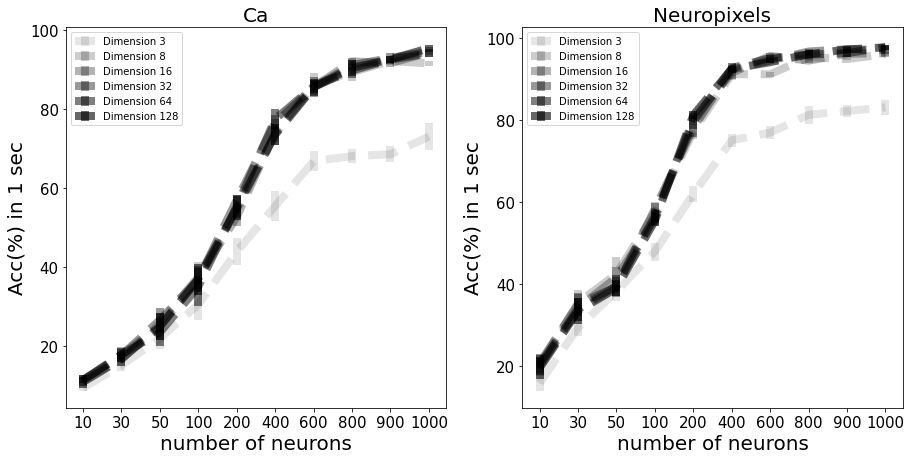

In [6]:
def mean_err(accs):
    accs=np.array(accs).reshape(10,5)
    means = np.zeros(10)
    errors = np.zeros(10)
    for i, n in enumerate(accs):
        mask = n!=None
        mean=n[mask].sum()/mask.sum()
        means[i]=mean
        error=np.std(n[mask], ddof=1) / np.sqrt(n[mask].size)
        errors[i] = error
    return means, errors
#units = [32,64,128]

plt.figure(figsize=(15,7))

ns = [10,30,50,100,200,400,600,800, 900,1000]
dims = [3,8,16,32,64,128]

ca_dims = data['decoding']['ca_dims']
np_dims = data['decoding']['np_dims']

for k,(data_dims, modality) in enumerate(zip([ca_dims, np_dims], ['Ca', 'Neuropixels'])):
    ax=plt.subplot(1,2,k+1)
    for i, d in enumerate(dims):
        mean = data_dims['mean'][d]
        err = data_dims['err'][d]
        a=(i+1)*0.1
        ax.errorbar(np.arange(10), mean, err, ls='--',  label = f'Dimension {d}', color = 'k', alpha =a, markersize= 20, linewidth = 8)
    plt.legend()
    plt.title(f'{modality}', fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Acc(%) in 1 sec', fontsize=20)
    plt.xlabel('number of neurons', fontsize=20)
    plt.xticks(np.arange(10),ns, fontsize=15)


Text(0.5, 1.0, 'Decoding Controls')

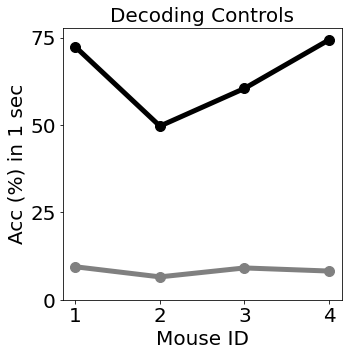

In [7]:

non_shuffled_decoding=data['decoding']['ca_non_shuffled']
shuffled_decoding = data['decoding']['ca_shuffled']

plt.figure(figsize=(5,5))
plt.plot(non_shuffled_decoding,'-o', c='black', linewidth=5, markersize=10)
plt.plot(shuffled_decoding,'-o', c='gray', linewidth=5, markersize=10)
plt.yticks(np.linspace(0,75,4), fontsize =20)
plt.xticks(np.arange(4), np.arange(1,5), fontsize=20)
plt.ylabel('Acc (%) in 1 sec', fontsize=20)
plt.xlabel('Mouse ID', fontsize=20)
plt.title('Decoding Controls', fontsize=20)

In [8]:
v1_color = "#9932EB"
def make_heatmap_from_df(df, title, vmax, vmin, white=False):
    upper=df.mask(np.triu(np.ones((6,6)),1).astype(bool))
    lower= df.mask(np.tril(np.ones((6,6)),-1).astype(bool))
    tri_mean = pd.concat([upper, lower.T]).groupby(level=0).mean()
    df = tri_mean.reindex(index=['VISal', 'VISrl', 'VISl', 'VISp', 'VISam', 'VISpm'],
                   columns=['VISal', 'VISrl', 'VISl', 'VISp', 'VISam', 'VISpm'])
    fig=plt.figure(figsize=(4,3))
    #plt.title(title)

    mask = np.triu(np.ones((6,6)),1)
    p=sns.heatmap(df, annot=True, vmin=vmin, vmax=vmax, cmap='gray_r', mask = mask, annot_kws={"size": 12},
                  cbar_kws=dict(ticks=np.arange(vmin, vmax+5, 5)) )
    if white:
        _c = 'white'
    else:
        _c = 'k'
    plt.yticks(rotation=0, color = _c)
    plt.xticks(color=_c)
    for a in p.axes.get_yticklines():
        a.set_color(_c)
    for a in p.axes.get_xticklines():
        a.set_color(_c)
    cbar=p.figure.axes[-1]
    cbar.yaxis.label.set_color(_c)
    cbar.tick_params(color=_c, labelcolor=_c)
    plt.show()
    
def make_line_strip_from_df(df, title, vmin, vmax, white=False):
    
    if white:
        _c = 'white'
    else:
        _c = 'k'
    
    def make_comparison(df,area):
        areas = df['area_type'].unique()
        inter_area = areas[[(area in a) and ('-' in a) for a in areas]]
        intra_median = df[(df['area_type'] == area) & (df['type'] == 'intra')].mean()
        non_related_inter_median = df[(df['area_type'] == inter_area[0]) | (df['area_type'] == inter_area[1])].mean()
        related_inter_median = df[(df['area_type'] == area) & (df['type'] == 'inter')].mean()
        return intra_median, related_inter_median, non_related_inter_median
   
    area_type = df['area']
    intra = df['intra']
    inter = df['inter']
    pair_type = ['intra']*len(intra) + ['inter']*len(inter)
    group = ['else' if '-' in a else a for a in area_type]
    color = [v1_color if (p=='intra' and c == 'primary') else 'gray' for p,c in zip(pair_type, area_type ) ]
    fig = plt.figure(figsize=(3,3))
    sns.set_style("ticks")
    
    # Set your custom color palette
    #sns.set_palette(sns.color_palette(COLORS))
    ax=plt.subplot(111)

    ax.set_yticks(np.linspace(0, 100, 11))
    plt.ylim(vmin, vmax)
    plt.xlim(-1,2)
    ax.set_xticks([0,1])
    ax.set_xticklabels(['intra', 'inter'], color = _c)
    ax.tick_params(axis='both', which='major', labelsize=15)
    sns.despine(left = False, right=True, bottom = False, top = True, trim = True, offset={'bottom':20})
    d=pd.DataFrame({'value': np.concatenate([intra.value, inter.value]), 'color': color , 'group':group,
             'type': ['intra']*len(intra) + ['inter']*len(inter), 'area_type': area_type,
                   'area1': np.concatenate([intra.Area1, inter.Area1]), 'area2':np.concatenate([intra.Area2, inter.Area2])})
    d.sort_values('color', ascending = False)
    d.sort_values('type', ascending = False)
    plot=sns.stripplot(x = 'type', y = 'value',  data=d, ax= ax, s=3,zorder=0, 
                       hue = 'color', palette={'gray':'gray',v1_color:v1_color})
    
    plt.ylabel('$R^2$', fontsize=20, color = _c)
    ax.spines['left'].set_color(_c)
    ax.spines['bottom'].set_color(_c)
    intra_median, related_inter_median, non_related_inter_median = make_comparison(d, 'primary')
    ax.plot([intra_median, non_related_inter_median], marker = 'o', color = v1_color )
    plt.legend([],[], frameon = False)
    for a in plot.axes.get_yticklines():
        a.set_color(_c)
    for a in plot.axes.get_xticklines():
        a.set_color(_c)
    
    plt.yticks(color=_c)
    plt.xticks(color=_c)
    
    plt.show()




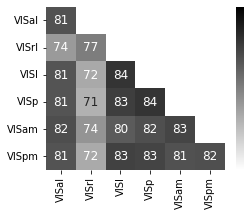

/tmp/ipykernel_7061/979042451.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df['area_type'] == area) & (df['type'] == 'intra')].mean()
/tmp/ipykernel_7061/979042451.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[(df['area_type'] == inter_area[0]) | (df['area_type'] == inter_area[1])].mean()


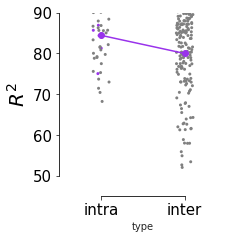

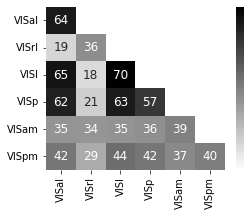

/tmp/ipykernel_7061/979042451.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df['area_type'] == area) & (df['type'] == 'intra')].mean()
/tmp/ipykernel_7061/979042451.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[(df['area_type'] == inter_area[0]) | (df['area_type'] == inter_area[1])].mean()


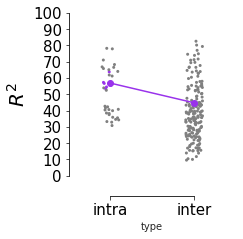

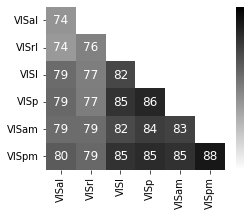

/tmp/ipykernel_7061/979042451.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df['area_type'] == area) & (df['type'] == 'intra')].mean()
/tmp/ipykernel_7061/979042451.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[(df['area_type'] == inter_area[0]) | (df['area_type'] == inter_area[1])].mean()


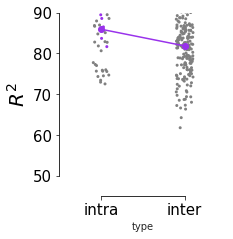

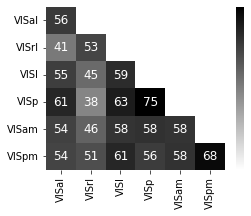

/tmp/ipykernel_7061/979042451.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df['area_type'] == area) & (df['type'] == 'intra')].mean()
/tmp/ipykernel_7061/979042451.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[(df['area_type'] == inter_area[0]) | (df['area_type'] == inter_area[1])].mean()


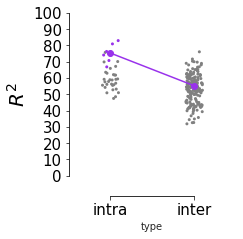

In [9]:
for m in ['ca', 'np']:
    for s in ['behavior','time']:
        if s =='behavior':
            vmin = 70
            vmax = 90
        else:
            vmin = 10
            vmax= 70
        make_heatmap_from_df(pd.DataFrame(data['cortical_consistency'][s][m]['cortices']),f'{m}-{s}', vmin, vmax )
        if s =='behavior':
            vmin = 50
            vamx = 100
        else:
            vmin = 0
            vmax= 100
        make_line_strip_from_df(data['cortical_consistency'][s][m]['v1'], f'{m}-{s}', vmin, vmax )